dont need to normalise the varibales 

## Model Creation: 

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import re

# Statistics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats

# Sklearn - model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Sklearn - linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv('Life_Expectancy_clean.csv')
# data.head()

In [3]:
# County_Ranked_(Yes1/No0) is causing an issue therefore rename:
data.rename(columns={'County_Ranked_(Yes1/No0)': 'County_Ranked'}, inplace=True)

<b>Drop the State Identification columns as they will exactly predict the life expectancy</b>

In [4]:
# Drop the  State_FIPS_Code & County_FIPS_Code
data.drop(columns=['State_FIPS_Code', 'County_FIPS_Code'], inplace=True)

## Check Normality of Variables

In [5]:
# X.hist(figsize=(16,30))
# plt.show()

## Train Test Split

In [6]:
X_init = data.drop(columns=['Life_Expectancy'])
y_init = data['Life_Expectancy']

In [7]:
X_init.shape, y_init.shape

((2138, 54), (2138,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=1000, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1138, 54), (1000, 54), (1138,), (1000,))

In [10]:
df_model = pd.concat([y_train,X_train], axis=1)
# df_model.head()

# Model 1:

- All variable carried forward from the cleaning

## K-fold / Cross Validation Model

In [11]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.9016229194751528


<b>Observations</b>

- Very High R^2 value -> similar to the stats module value
- Look to reduce variables

## Statsmodule OLS model

In [12]:
X_const_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const_train).fit()
model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:11:43   Log-Likelihood:                -1430.3
No. Observations:                1138   AIC:                             2971.
Df Residuals:                    1083   BIC:                             3248.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.3887      0.026   2975.538      0.000      77.338      77.440
Premature_death_raw_value                                      -0.4079      0.114     -3.576      0.000      -0.632      -0.184
Poor_or_fair_health_raw_value                                   0.2454      0.121      2.023      0.043       0.007       0.483
Poor_physical_health_days_raw_value                            -0.4889      0.298     -1.643      0.101      -1.073       0.095
Poor_mental_health_days_raw_value                               0.0090      0.183      0.049      0.961      -0.350       0.368
Low_birthweight_raw_value                                      -0.0182      0.046     -0.399      0.690      -0.107       0.071
Adult_smoking_raw_value                                         0.0593      0.072      0.820      0.412      -0.083       0.201
Adult_obesity_raw_value                                        -0.0275      0.044     -0.628      0.530      -0.113       0.058
Food_environment_index_raw_value                               -0.7075      0.517     -1.368      0.172      -1.722       0.307
Physical_inactivity_raw_value                                  -0.0217      0.051     -0.425      0.671      -0.122       0.079
Access_to_exercise_opportunities_raw_value                     -0.0189      0.039     -0.490      0.624      -0.095       0.057
Excessive_drinking_raw_value                                   -0.0515      0.050     -1.030      0.303      -0.150       0.047
Alcohol_impaired_driving_deaths_raw_value                       0.0122      0.028      0.432      0.666      -0.043       0.068
Sexually_transmitted_infections_raw_value                       0.0452      0.039      1.172      0.242      -0.031       0.121
Teen_births_raw_value                                           0.0564      0.057      0.983      0.326      -0.056       0.169
Uninsured_raw_value                                             2.1760      0.654      3.327      0.001       0.893       3.460
Primary_care_physicians_raw_value                              -0.0680      0.041     -1.650      0.099      -0.149       0.013
Dentists_raw_value                                              0.0222      0.037      0.607      0.544      -0.050       0.094
Mental_health_providers_raw_value                              -0.0127      0.032     -0.401      0.689      -0.075       0.049
Preventable_hospital_stays_raw_value                           -0.0045      0.034     -0.132      0.895      -0.071       0.062
Mammography_screening_raw_value                                -0.0091      0.040     -0.231      0.817      -0.087       0.068
Flu_vaccina

<b>Observations</b>

- High R^2 value
- High AIC & BIC Values as lots of features

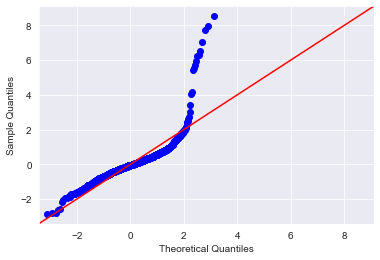

In [13]:
model_qqplot = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [14]:
q=0.9

# Set the index to q range
drop_index_train=y_train[y_train > y_train.quantile(q)].index
# drop_index_test=y_test[y_test > y_test.quantile(q)].index

# Apply to Train
X_train = X_train.drop(index = drop_index_train)
y_train = y_train[y_train <= y_train.quantile(q)]

# Apply to Test
# X_test = X_test.drop(index = drop_index_test)
# y_test = y_test[y_test <= y_test.quantile(q)]

# Stats OLS Model
X_const_train = sm.add_constant(X_train)
model_qq = sm.OLS(y_train, X_const_train).fit()
model_qq.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     337.1
Date:                Tue, 14 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:11:43   Log-Likelihood:                -883.57
No. Observations:                1024   AIC:                             1877.
Df Residuals:                     969   BIC:                             2148.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.2365      0.019   4028.563      0.000      77.199      77.274
Premature_death_raw_value                                      -0.5020      0.082     -6.110      0.000      -0.663      -0.341
Poor_or_fair_health_raw_value                                   0.1554      0.087      1.779      0.076      -0.016       0.327
Poor_physical_health_days_raw_value                            -0.4482      0.215     -2.086      0.037      -0.870      -0.026
Poor_mental_health_days_raw_value                               0.0072      0.131      0.055      0.956      -0.249       0.264
Low_birthweight_raw_value                                      -0.0149      0.032     -0.462      0.644      -0.078       0.049
Adult_smoking_raw_value                                         0.0319      0.052      0.618      0.536      -0.069       0.133
Adult_obesity_raw_value                                        -0.0644      0.031     -2.070      0.039      -0.125      -0.003
Food_environment_index_raw_value                               -0.6886      0.354     -1.946      0.052      -1.383       0.006
Physical_inactivity_raw_value                                  -0.0396      0.036     -1.093      0.275      -0.111       0.032
Access_to_exercise_opportunities_raw_value                     -0.0317      0.027     -1.163      0.245      -0.085       0.022
Excessive_drinking_raw_value                                    0.0244      0.037      0.652      0.515      -0.049       0.098
Alcohol_impaired_driving_deaths_raw_value                       0.0382      0.021      1.849      0.065      -0.002       0.079
Sexually_transmitted_infections_raw_value                       0.0131      0.027      0.489      0.625      -0.040       0.066
Teen_births_raw_value                                          -0.0833      0.040     -2.060      0.040      -0.163      -0.004
Uninsured_raw_value                                             0.8662      0.471      1.838      0.066      -0.059       1.791
Primary_care_physicians_raw_value                              -0.0982      0.031     -3.146      0.002      -0.159      -0.037
Dentists_raw_value                                              0.0218      0.027      0.792      0.429      -0.032       0.076
Mental_health_providers_raw_value                               0.0018      0.022      0.083      0.934      -0.042       0.045
Preventable_hospital_stays_raw_value                           -0.0243      0.024     -1.001      0.317      -0.072       0.023
Mammography_screening_raw_value                                -0.0096      0.029     -0.337      0.736      -0.066       0.046
Flu_vaccina

<b>Old</b>

Skew:	3.076	
Kurtosis:	23.230

<b>New</b>

Skew:	1.238	
Kurtosis:	11.732	

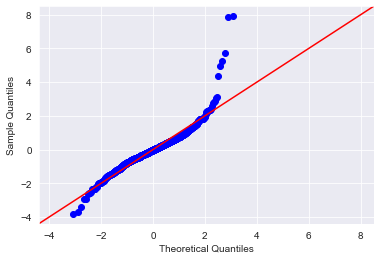

In [15]:
model_qqplot = sm.graphics.qqplot(model_qq.resid, dist=stats.norm, line='45', fit=True)

## Drop Columns on Non-Statistical Evaluation  
<b>Ease of collection</b>
- Has to be a value which is identifiable to the person? i.e Man

<b>Quantifiability</b>
- asd


<b>Cost of Collection</b>
- asdf

In [16]:
# X_cols = list(X.columns)
# for x in X_cols:
#     print(x)

In [17]:
# Drop max
drop = ['Premature_death_raw_value', 
        'Premature_age_adjusted_mortality_raw_value',
        'Poor_or_fair_health_raw_value', 
        'Poor_physical_health_days_raw_value', 
        'Poor_mental_health_days_raw_value', 
        'Adult_smoking_raw_value', 
        'Physical_inactivity_raw_value', 
        'Excessive_drinking_raw_value',
        'Preventable_hospital_stays_raw_value', 
        'Mammography_screening_raw_value', 
        'Driving_alone_to_work_raw_value',
        'Long_commute___driving_alone_raw_value', 
        'Frequent_physical_distress_raw_value', 
        'Frequent_mental_distress_raw_value',
        'Insufficient_sleep_raw_value',
        'Other_primary_care_providers_raw_value',
        'Drinking_water_violations_raw_value']
len(drop)

17

In [18]:
# # Drop Hard to measure
# drop = ['Premature_age_adjusted_mortality_raw_value', 
#         'Premature_death_raw_value', 
#         'Poor_or_fair_health_raw_value', 
#         'Poor_physical_health_days_raw_value', 
#         'Poor_mental_health_days_raw_value']
# len(drop)

In [19]:
cols = list(X_train.columns)
new_cols = [x for x in cols if x not in drop]

In [20]:
X_1 = X_train[new_cols]
len(X_train.columns) , len(X_1.columns)

(54, 37)

In [21]:
# Run if wish to check all variables
# X_1 = X.copy()

# Model 2:

In [22]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_1, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.721812199993954


In [23]:
X_const = sm.add_constant(X_1)

model1 = sm.OLS(y_train, X_const).fit()
model1.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     87.29
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          9.60e-282
Time:                        19:11:43   Log-Likelihood:                -1667.9
No. Observations:                1024   AIC:                             3412.
Df Residuals:                     986   BIC:                             3599.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                          77.1583      0.041   1905.011      0.000      77.079      77.238
Low_birthweight_raw_value                                       0.0414      0.062      0.663      0.507      -0.081       0.164
Adult_obesity_raw_value                                        -0.1572      0.061     -2.593      0.010      -0.276      -0.038
Food_environment_index_raw_value                               -0.3224      0.749     -0.431      0.667      -1.792       1.147
Access_to_exercise_opportunities_raw_value                      0.0124      0.056      0.224      0.823      -0.097       0.121
Alcohol_impaired_driving_deaths_raw_value                       0.0994      0.043      2.303      0.021       0.015       0.184
Sexually_transmitted_infections_raw_value                      -0.1444      0.055     -2.606      0.009      -0.253      -0.036
Teen_births_raw_value                                          -0.7781      0.077    -10.053      0.000      -0.930      -0.626
Uninsured_raw_value                                             1.8587      0.942      1.974      0.049       0.011       3.707
Primary_care_physicians_raw_value                              -0.0112      0.055     -0.203      0.839      -0.120       0.097
Dentists_raw_value                                              0.0070      0.057      0.123      0.902      -0.105       0.119
Mental_health_providers_raw_value                              -0.0925      0.046     -2.021      0.044      -0.182      -0.003
Flu_vaccinations_raw_value                                      0.0176      0.052      0.338      0.736      -0.084       0.120
High_school_graduation_raw_value                               -0.1932      0.048     -4.037      0.000      -0.287      -0.099
Some_college_raw_value                                         -0.0030      0.069     -0.044      0.965      -0.139       0.133
Unemployment_raw_value                                          0.0662      0.065      1.020      0.308      -0.061       0.194
Children_in_poverty_raw_value                                  -0.0514      0.108     -0.475      0.635      -0.264       0.161
Income_inequality_raw_value                                    -0.1059      0.059     -1.800      0.072      -0.221       0.010
Children_in_single_parent_households_raw_value                 -0.0886      0.070     -1.273      0.203      -0.225       0.048
Social_associations_raw_value                                  -0.0041      0.053     -0.077      0.939      -0.108       0.100
Violent_crime_raw_value                                         0.0308      0.051      0.607      0.544      -0.069       0.130
Injury_deat

## Eliminate Features using the P-value score

In [24]:
def func_rfe(X_1, model):
    X_cols = list(X_1.columns)
    X_cols = ['const'] + X_cols
    rfe = list(zip(X_cols, model.pvalues))
    rfe = pd.DataFrame(rfe, columns=['Parameters', 'P_values'])
    rfe.sort_values(by='P_values', ascending=True, inplace=True)
    rfe_reduced = rfe.loc[rfe['P_values'] < 0.05]
    return rfe_reduced

In [25]:
rfe_reduced = func_rfe(X_1, model1)
rfe_reduced

,Parameters,P_values
0,const,0.000000e+00
21,Injury_deaths_raw_value,1.576302e-43
7,Teen_births_raw_value,1.056069e-22
22,Air_pollution___particulate_matter_raw_value,3.973690e-08
24,Diabetes_prevalence_raw_value,3.098748e-07
13,High_school_graduation_raw_value,5.827431e-05
36,Population_raw_value,3.081506e-03
28,Motor_vehicle_crash_deaths_raw_value,6.984724e-03
6,Sexually_transmitted_infections_raw_value,9.303460e-03
2,Adult_obesity_raw_value,9.652550e-03


In [26]:
rfe_reduced = rfe_reduced.loc[rfe_reduced['Parameters'] != 'const']
X_cols = list(rfe_reduced.Parameters)
X_2 = X_1[X_cols]
# X_2.sort_index()

In [27]:
X_1.shape[1], X_2.shape[1]

(37, 14)

# Model 3:

In [28]:
X_const = sm.add_constant(X_2)

model2 = sm.OLS(y_train, X_const).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.10e-283
Time:                        19:11:44   Log-Likelihood:                -1721.8
No. Observations:                1024   AIC:                             3474.
Df Residuals:                    1009   BIC:                             3548.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           77.1440      0.042   1858.798      0.000      77.063      77.225
Injury_deaths_raw_value                         -0.8379      0.054    -15.534      0.000      -0.944      -0.732
Teen_births_raw_value                           -0.8156      0.063    -12.967      0.000      -0.939      -0.692
Air_pollution___particulate_matter_raw_value    -0.4138      0.056     -7.383      0.000      -0.524      -0.304
Diabetes_prevalence_raw_value                   -0.5442      0.065     -8.412      0.000      -0.671      -0.417
High_school_graduation_raw_value                -0.1544      0.046     -3.326      0.001      -0.246      -0.063
Population_raw_value                             0.1998      0.050      3.972      0.000       0.101       0.299
Motor_vehicle_crash_deaths_raw_value            -0.1830      0.056     -3.239      0.001      -0.294      -0.072
Sexually_transmitted_infections_raw_value       -0.2904      0.046     -6.268      0.000      -0.381      -0.199
Adult_obesity_raw_value                         -0.1466      0.060     -2.443      0.015      -0.264      -0.029
Alcohol_impaired_driving_deaths_raw_value        0.1039      0.044      2.339      0.020       0.017       0.191
Uninsured_adults_raw_value                      -2.6010      0.396     -6.563      0.000      -3.379      -1.823
County_Ranked                                    0.1380      0.045      3.078      0.002       0.050       0.226
Mental_health_providers_raw_value               -0.1718      0.043     -4.007      0.000      -0.256      -0.088
Uninsured_raw_value                              2.7002      0.386      6.997      0.000       1.943       3.457
==============================================================================
Omnibus:                       67.261   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.896
Skew:                          -0.284   Prob(JB):                     8.74e-45
Kurtosis:                       5.105   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Adjust Baseline & Run RFE

In [29]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_2, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.7190319812371023


In [30]:
rfe_red2 = func_rfe(X_2, model2)
rfe_red2

,Parameters,P_values
0,const,0.000000e+00
1,Injury_deaths_raw_value,5.921421e-49
2,Teen_births_raw_value,1.126553e-35
4,Diabetes_prevalence_raw_value,1.362022e-16
3,Air_pollution___particulate_matter_raw_value,3.244668e-13
14,Uninsured_raw_value,4.752185e-12
11,Uninsured_adults_raw_value,8.437311e-11
8,Sexually_transmitted_infections_raw_value,5.413575e-10
13,Mental_health_providers_raw_value,6.611039e-05
6,Population_raw_value,7.626313e-05


In [31]:
rfe_red2 = rfe_red2.loc[rfe_red2['Parameters'] != 'const']
X_cols = list(rfe_red2.Parameters)
X_3 = X_2[X_cols]
# X_3.sort_index()

In [32]:
X_2.shape[1], X_3.shape[1]

(14, 14)

In [33]:
X_const = sm.add_constant(X_3)

model3 = sm.OLS(y_train, X_const).fit()
model3.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     205.3
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.10e-283
Time:                        19:11:44   Log-Likelihood:                -1721.8
No. Observations:                1024   AIC:                             3474.
Df Residuals:                    1009   BIC:                             3548.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           77.1440      0.042   1858.798      0.000      77.063      77.225
Injury_deaths_raw_value                         -0.8379      0.054    -15.534      0.000      -0.944      -0.732
Teen_births_raw_value                           -0.8156      0.063    -12.967      0.000      -0.939      -0.692
Diabetes_prevalence_raw_value                   -0.5442      0.065     -8.412      0.000      -0.671      -0.417
Air_pollution___particulate_matter_raw_value    -0.4138      0.056     -7.383      0.000      -0.524      -0.304
Uninsured_raw_value                              2.7002      0.386      6.997      0.000       1.943       3.457
Uninsured_adults_raw_value                      -2.6010      0.396     -6.563      0.000      -3.379      -1.823
Sexually_transmitted_infections_raw_value       -0.2904      0.046     -6.268      0.000      -0.381      -0.199
Mental_health_providers_raw_value               -0.1718      0.043     -4.007      0.000      -0.256      -0.088
Population_raw_value                             0.1998      0.050      3.972      0.000       0.101       0.299
High_school_graduation_raw_value                -0.1544      0.046     -3.326      0.001      -0.246      -0.063
Motor_vehicle_crash_deaths_raw_value            -0.1830      0.056     -3.239      0.001      -0.294      -0.072
County_Ranked                                    0.1380      0.045      3.078      0.002       0.050       0.226
Adult_obesity_raw_value                         -0.1466      0.060     -2.443      0.015      -0.264      -0.029
Alcohol_impaired_driving_deaths_raw_value        0.1039      0.044      2.339      0.020       0.017       0.191
==============================================================================
Omnibus:                       67.261   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.896
Skew:                          -0.284   Prob(JB):                     8.74e-45
Kurtosis:                       5.105   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Interactions 

In [34]:
def feature_combinations_r_sqrd_with_Inter_df(X, y, X_test, num_feat_comb=2):
    # Requires cals: baseline & crossvalidation
    
    # Create Regression & Combinations
    from itertools import combinations
    combinations = list(combinations(list(X.columns), num_feat_comb))
    
    # Create cross-validation & output a bassline MSE score as a DataFrame
    comb_scores = []
    inter_cols = []
    inter_score = []
    inter_score_test = []
    data = X.copy()
    data_test = X_test.copy()
    
    for comb in combinations:
        data['interaction'] = data[comb[0]] * data[comb[1]]
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: 
            comb_scores.append(round(score,3))
            inter_cols.append((str(comb[0]) + '_AND_' + str(comb[1])))
            inter_score.append(data[comb[0]] * data[comb[1]])
            inter_score_test.append(data_test[comb[0]] * data_test[comb[1]])
    
    # Train Data 
    df_base = pd.DataFrame(data=[inter_cols, comb_scores])
    df_base = df_base.T  
    df_base.rename(columns={0: "Interaction", 1: "CV_score"}, inplace=True)
    df_base.sort_values(by='CV_score', inplace = True, ascending=False )
    df_base.reset_index(drop=True, inplace = True)
    
    df_interactions_scores = pd.DataFrame(data=inter_score , index=inter_cols)
    df_interactions_scores = df_interactions_scores.T
    
    # Test Data    
    df_interactions_scores_test = pd.DataFrame(data=inter_score_test , index=inter_cols)
    df_interactions_scores_test = df_interactions_scores_test.T

    return df_base , df_interactions_scores, df_interactions_scores_test

In [35]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_3, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.7190319812371024


In [36]:
X_cols = list(X_3.columns)
X_3_test = X_test[X_cols]

In [37]:
all(X_3.columns == X_3_test.columns)

True

In [38]:
df_inter, df_score, df_score_test = feature_combinations_r_sqrd_with_Inter_df(X_3, y_train, X_test=X_3_test)

In [39]:
df_inter.head(20)

,Interaction,CV_score
0,Teen_births_raw_value_AND_Uninsured_adults_raw...,0.728
1,Teen_births_raw_value_AND_Uninsured_raw_value,0.728
2,Injury_deaths_raw_value_AND_Adult_obesity_raw_...,0.726
3,Teen_births_raw_value_AND_Diabetes_prevalence_...,0.724
4,Injury_deaths_raw_value_AND_Teen_births_raw_value,0.724
5,Injury_deaths_raw_value_AND_County_Ranked,0.724
6,Injury_deaths_raw_value_AND_Air_pollution___pa...,0.723
7,Teen_births_raw_value_AND_Adult_obesity_raw_value,0.723
8,Injury_deaths_raw_value_AND_Diabetes_prevalenc...,0.722
9,Population_raw_value_AND_Adult_obesity_raw_value,0.721


In [40]:
def add_interaction_feature(data, df_inter, df_score, num_inter):
    i=0
    
    while i < num_inter:
        col = df_inter['Interaction'][i]
  
        data[col] = df_score[col]
        i+=1
    
    return data

In [41]:
data_combined = add_interaction_feature(X_3, df_inter, df_score, 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [42]:
data_combined_test = add_interaction_feature(X_3_test, df_inter, df_score_test, 10)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Run Interaction Model 

In [43]:
X_const = sm.add_constant(data_combined)

model_inter = sm.OLS(y_train, X_const).fit()
model_inter.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     139.9
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.52e-299
Time:                        19:11:47   Log-Likelihood:                -1657.8
No. Observations:                1024   AIC:                             3366.
Df Residuals:                     999   BIC:                             3489.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       77.0886      0.050   1553.851      0.000      76.991      77.186
Injury_deaths_raw_value                                                     -0.8580      0.058    -14.685      0.000      -0.973      -0.743
Teen_births_raw_value                                                       -0.8317      0.061    -13.566      0.000      -0.952      -0.711
Diabetes_prevalence_raw_value                                               -0.3869      0.065     -5.993      0.000      -0.514      -0.260
Air_pollution___particulate_matter_raw_value                                -0.3827      0.055     -6.898      0.000      -0.492      -0.274
Uninsured_raw_value                                                          3.2860      0.419      7.837      0.000       2.463       4.109
Uninsured_adults_raw_value                                                  -3.4291      0.434     -7.904      0.000      -4.280      -2.578
Sexually_transmitted_infections_raw_value                                   -0.2509      0.047     -5.304      0.000      -0.344      -0.158
Mental_health_providers_raw_value                                           -0.0818      0.042     -1.953      0.051      -0.164       0.000
Population_raw_value                                                         0.3220      0.090      3.573      0.000       0.145       0.499
High_school_graduation_raw_value                                            -0.1143      0.044     -2.586      0.010      -0.201      -0.028
Motor_vehicle_crash_deaths_raw_value                                        -0.0677      0.056     -1.221      0.223      -0.177       0.041
County_Ranked                                                                0.1351      0.043      3.149      0.002       0.051       0.219
Adult_obesity_raw_value                                                     -0.0989      0.058     -1.703      0.089      -0.213       0.015
Alcohol_impaired_driving_deaths_raw_value                                    0.1033      0.042      2.445      0.015       0.020       0.186
Teen_births_raw_value_AND_Uninsured_adults_raw_value                         0.6294      0.248      2.538      0.011       0.143       1.116
Teen_births_raw_value_AND_Uninsured_raw_value                               -0.3641      0.255     -1.426      0.154      -0.865       0.137
Injury_deaths_raw_value_AND_Adult_obesity_raw_value                         -0.0320      0.066     -0.488      0.626      -0.161       0.097
Teen_births_raw_value_AND_Diabetes_prevalence_raw_value                      0.0087      0.064      0.134      0.893      

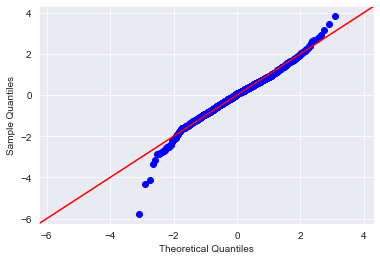

In [44]:
model_qqplot = sm.graphics.qqplot(model_inter.resid, dist=stats.norm, line='45', fit=True)

## RFE on Interactions Model

In [45]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, data_combined, y_train, scoring='r2', cv=crossvalidation))
print("Inital R^2:", baseline)

Inital R^2: 0.7362679528395656


In [46]:
df_inter_rfe = func_rfe(data_combined, model_inter)
df_inter_rfe

,Parameters,P_values
0,const,0.000000e+00
1,Injury_deaths_raw_value,2.382390e-44
2,Teen_births_raw_value,1.334297e-38
6,Uninsured_adults_raw_value,7.098837e-15
5,Uninsured_raw_value,1.177109e-14
4,Air_pollution___particulate_matter_raw_value,9.363417e-12
3,Diabetes_prevalence_raw_value,2.866612e-09
7,Sexually_transmitted_infections_raw_value,1.397220e-07
19,Injury_deaths_raw_value_AND_Teen_births_raw_value,4.120321e-07
21,Injury_deaths_raw_value_AND_Air_pollution___pa...,1.134095e-05


In [47]:
rfe_red_inter = df_inter_rfe.loc[df_inter_rfe['Parameters'] != 'const']
X_cols = list(rfe_red_inter.Parameters)
df_inter_reduced = data_combined[X_cols]
# X_3.sort_index()

In [48]:
X_const = sm.add_constant(df_inter_reduced)

model_inter_red = sm.OLS(y_train, X_const).fit()
model_inter_red.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     234.6
Date:                Tue, 14 Jan 2020   Prob (F-statistic):          2.57e-305
Time:                        19:11:47   Log-Likelihood:                -1670.4
No. Observations:                1024   AIC:                             3371.
Df Residuals:                    1009   BIC:                             3445.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       77.0378      0.045   1720.795      0.000      76.950      77.126
Injury_deaths_raw_value                                                     -0.8691      0.054    -16.108      0.000      -0.975      -0.763
Teen_births_raw_value                                                       -0.8806      0.059    -14.818      0.000      -0.997      -0.764
Uninsured_adults_raw_value                                                  -3.4485      0.405     -8.513      0.000      -4.243      -2.654
Uninsured_raw_value                                                          3.3101      0.388      8.527      0.000       2.548       4.072
Air_pollution___particulate_matter_raw_value                                -0.3512      0.054     -6.464      0.000      -0.458      -0.245
Diabetes_prevalence_raw_value                                               -0.4497      0.057     -7.916      0.000      -0.561      -0.338
Sexually_transmitted_infections_raw_value                                   -0.2551      0.046     -5.520      0.000      -0.346      -0.164
Injury_deaths_raw_value_AND_Teen_births_raw_value                           -0.2745      0.030     -9.130      0.000      -0.333      -0.215
Injury_deaths_raw_value_AND_Air_pollution___particulate_matter_raw_value    -0.2602      0.039     -6.675      0.000      -0.337      -0.184
Population_raw_value                                                         0.2057      0.047      4.396      0.000       0.114       0.298
County_Ranked                                                                0.1086      0.042      2.566      0.010       0.026       0.192
High_school_graduation_raw_value                                            -0.0934      0.043     -2.156      0.031      -0.178      -0.008
Teen_births_raw_value_AND_Uninsured_adults_raw_value                         0.3024      0.041      7.446      0.000       0.223       0.382
Alcohol_impaired_driving_deaths_raw_value                                    0.1082      0.042      2.557      0.011       0.025       0.191
==============================================================================
Omnibus:                       62.901   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.950
Skew:                          -0.314   Prob(JB):                     4.13e-36
Kurtosis:                       4.850   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

# Polynomial Parameters

In [49]:
# from sklearn.preprocessing import PolynomialFeatures

# regression = LinearRegression()
# crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# polynomials = []
# for col in X.columns:
#     for degree in [2, 3, 4]:
#         data = X.copy()
#         poly = PolynomialFeatures(degree, include_bias=False)
#         X_transformed = poly.fit_transform(X[[col]])
#         data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
#         score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#         if score > baseline: polynomials.append((col, degree, round(score, 3)))
# print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

In [50]:
# polynom = pd.DataFrame(polynomials)
# polynom.groupby([0], sort=False)[2].max()

# Full model R-squared  

In [51]:
full_model = np.mean(cross_val_score(regression, data_combined, y_train, scoring='r2', cv=crossvalidation))
print("Full model R^2:", full_model)

Full model R^2: 0.7362679528395656


# Lasso

In [52]:
X_final = data_combined

## AIC & BIC Alpha Selection using Lasso

In [53]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


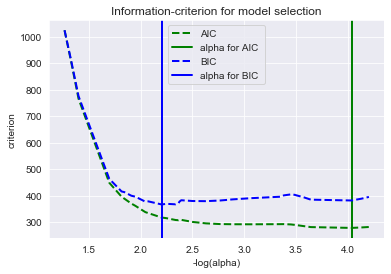

In [54]:
# Finding the optimum alpha value for the AIC & BIC critiria

model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(X_final, y_train)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X_final, y_train)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

## Validations Against  Test Data

In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [56]:
def model_validation(X_train, y_train, X_test, y_test):
    # cuting shapes
    print("Train Shapes:", X_train.shape, y_train.shape) 
    print("Test Shapes:", X_test.shape, y_test.shape)
    
    # Code for baseline model
    linreg_all = LinearRegression()
    linreg_all.fit(X_train, y_train)

    # Print R2 and MSE
    print("----------------------------------------")
    print('Training r^2:', linreg_all.score(X_train, y_train))
    print('Test r^2:', linreg_all.score(X_test, y_test))
    print("----------------------------------------")
    print('Training MSE:', mean_squared_error(y_train, linreg_all.predict(X_train)))
    print('Test MSE:', mean_squared_error(y_test, linreg_all.predict(X_test)))

### Baseline model validation

In [57]:
model_validation(X_train, y_train , X_test, y_test)

Train Shapes: (1024, 54) (1024,)
Test Shapes: (1000, 54) (1000,)
----------------------------------------
Training r^2: 0.9494553203010875
Test r^2: 0.8794464580290359
----------------------------------------
Training MSE: 0.32885123621905865
Test MSE: 0.986947265213196


### After the Baseline Drops Validations

In [58]:
X_cols = list(X_1.columns)
X_1_test = X_test[X_cols]

In [59]:
model_validation(X_1, y_train , X_1_test, y_test)

Train Shapes: (1024, 37) (1024,)
Test Shapes: (1000, 37) (1000,)
----------------------------------------
Training r^2: 0.7661214692051149
Test r^2: 0.7021406891558394
----------------------------------------
Training MSE: 1.5216486568941487
Test MSE: 2.4385134393374845


### RFE Model Validation

In [60]:
X_cols = list(X_2.columns)
X_3_test = X_test[X_cols]

In [61]:
model_validation(X_2, y_train , X_3_test, y_test)

Train Shapes: (1024, 14) (1024,)
Test Shapes: (1000, 14) (1000,)
----------------------------------------
Training r^2: 0.7401500757188739
Test r^2: 0.6794233202536628
----------------------------------------
Training MSE: 1.6906224223855495
Test MSE: 2.62449590608444


### Interactions Model Validation

In [62]:
X_inter = data_combined.copy()
X_cols = list(X_inter.columns)
X_inter_test = data_combined_test[X_cols]

In [64]:
model_validation(X_inter, y_train , X_inter_test, y_test)

Train Shapes: (1024, 24) (1024,)
Test Shapes: (1000, 24) (1000,)
----------------------------------------
Training r^2: 0.7707205189377095
Test r^2: 0.6785005865223654
----------------------------------------
Training MSE: 1.491726552352071
Test MSE: 2.632050138981581


### Interactions RFE Model Validation

In [68]:
X_inter_rfe = df_inter_reduced.copy()
X_cols = list(X_inter_rfe.columns)
X_inter_rfe_test = data_combined_test[X_cols]

In [69]:
model_validation(X_inter_rfe, y_train , X_inter_rfe_test, y_test)

Train Shapes: (1024, 14) (1024,)
Test Shapes: (1000, 14) (1000,)
----------------------------------------
Training r^2: 0.7649727066675007
Test r^2: 0.6800329936141075
----------------------------------------
Training MSE: 1.5291226775599622
Test MSE: 2.619504634605173


## Lasso paths

In [65]:
from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path

In [66]:
def comp_lasso_paths(X,y, eps=5e-3):
    
    eps = eps  # path length (Smaller = Longer)

    # Compute paths
    print("Computing regularization path using the lasso...")
    alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
    
    print("Computing regularization path using the positive lasso...")
    alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(
        X, y, eps, positive=True, fit_intercept=False)
    print("Computing regularization path using the elastic net...")
    alphas_enet, coefs_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)

    print("Computing regularization path using the positive elastic net...")
    alphas_positive_enet, coefs_positive_enet, _ = enet_path(
        X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)
    
    # Display results

    plt.figure(1)
    colors = cycle(['b', 'r', 'g', 'c', 'k'])
    neg_log_alphas_lasso = -np.log10(alphas_lasso)
    neg_log_alphas_enet = -np.log10(alphas_enet)
    for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and Elastic-Net Paths')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
    plt.axis('tight')


    plt.figure(2)
    neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
    for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
        l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
        l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and positive Lasso')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')
    plt.axis('tight')


    plt.figure(3)
    neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
    for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
        l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
        l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Elastic-Net and positive Elastic-Net')
    plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),
               loc='lower left')
    plt.axis('tight')
    plt.show()
    
    return None

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


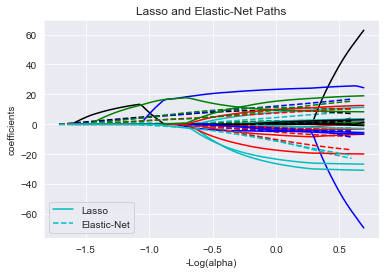

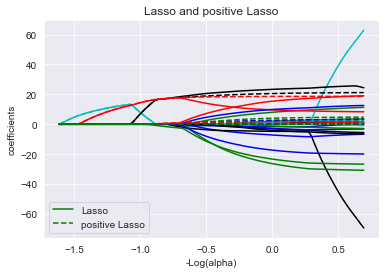

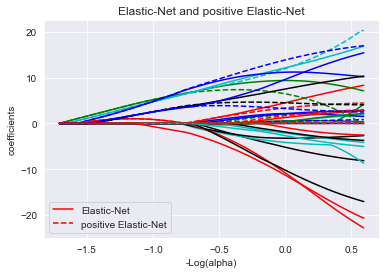

In [70]:
comp_lasso_paths(X_final, y_train, eps=5e-3)

In [ ]:
x

# ZZ -  Feature ranking to recursive eliminate features

In [ ]:
# df_feat_rank = pd.concat([y,X_1], axis=1)
# df_feat_rank.head()

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=20) # 20 most important features
selector = selector.fit(X_1, y)
estimators = selector.estimator_

In [ ]:
# print(selector.support_ )
# print(selector.ranking_)
# print(estimators.coef_)
# print(estimators.intercept_)
print(selector.classes_)

In [ ]:
# dir(selector)

In [ ]:
X_cols = list(X_1.columns)
X_best = []
i=0
for x in selector.support_:
    if x == True:
        X_best.append((X_cols[i], selector.ranking_[i]))
    i+=1

In [ ]:
# X_best

In [ ]:
sell = list(zip(X_cols, estimators.coef_, selector.ranking_, selector.support_))
df_selection = pd.DataFrame(sell, columns=['X_cols', 'coef','ranking', 'support'])
df_selection.sort_values(by=['ranking'], inplace=True)
df_selection.head(30)

In [ ]:
corr = X_1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, 
           center=True)